# CHAPTER 1 — Introduction: The Urban Scientist's Mission

## Cities of Tomorrow: Why this notebook exists

The **Fabric Data Days – Notebooks Contest: Cities of Tomorrow** invites us to use Data Science notebooks to understand how cities grow, transform, and try to balance **urban development** with **environmental sustainability**.

The official challenge brief is clear: given a dataset about sustainable urban planning and landscape, we must explore, model, and tell a data-informed story about **"Cities of Tomorrow – Urban Growth & Sustainability"**.

---

## My role on this journey: the Urban Scientist

In this notebook I act as an **urban scientist**: someone who uses data to answer a single, decisive question:

> **How can cities grow without sacrificing quality of life and the environment?**

Throughout the following chapters I will:
- **Observe** how different cities behave regarding green areas, urban density, transport, clean energy, pollution and livability;
- **Measure** the balance (or imbalance) between urban growth and sustainability;
- **Propose** a compact index — a synthetic score to help compare "Cities of Tomorrow" at a glance.

---

## Where do the data come from?

This notebook starts from the main dataset:

- **Sustainable Urban Planning & Landscape Dataset (Kaggle)**  
  It contains variables such as:  
  `Green Area %`, `Urban Density`, `Transport Infrastructure Score`,  
  `Renewable Energy Index`, `Pollution Index`, `Livability Index`.

Optionally, the analysis can be enriched with:
- World Bank indicators (urbanization, population growth, etc.);
- UN-Habitat metrics (housing, urban services, inequality, etc.).

These additional sources will be used to:
- **Create our own indices** (for example, a Sustainable Balance Index);
- **Compare** what official indicators say with what our statistical model learns.

---

## Notebook objectives

This notebook has three main objectives:

1. **Explore** urban data
   - Data cleaning and handling missing values;
   - Understand distributions of key variables;
   - Identify patterns, correlations and city clusters.

2. **Model** the future of cities
   - Fit predictive models (e.g., regression or tree methods) to estimate an urban sustainability score;
   - Measure which factors most contribute to a city being more sustainable and livable.

3. **Tell an actionable story** for decision makers
   - Translate technical findings into accessible language for public managers, urban planners and the broader community;
   - Connect each visualization and metric to policy recommendations.

---

## Notebook structure

This notebook is organized into chapters covering the full analytical journey:

1. Chapter 1 — Introduction
2. Chapter 2 — Getting to know the Cities of Tomorrow (EDA)
3. Chapter 3 — Advanced diagnosis: the city's pulse
4. Chapter 4 — Predictive modeling: revealing the critical factor
5. Chapter 5 — Predictive modeling: which factors explain urban sustainability
6. Chapter 6 — Global context: WDI and UN-Habitat indicators
7. Chapter 7 — Modeling and explainability (SHAP)
8. Chapter 8 — Clustering the Cities of Tomorrow
9. Chapter 9 — Final model evaluation and scenarios
10. Chapter 10 — Final predictive modeling, comparison and explainability
11. Chapter 11 — Integrated conclusion, decision framework and technical appendix

---

> **Mission:** Use the urban scientist's lens to turn data into **actionable insights** about making cities greener, fairer and more livable.

# CHAPTER 2 — Getting to Know the Cities of Tomorrow
### Loading the data that will guide our investigation

We now start the field work — analyzing variables that describe the **real-life cities**: their green areas, density, mobility, energy, pollution and livability.

In this first stage of the chapter we will:

- Load the main dataset
- Inspect the first rows
- Check column formats
- Identify possible inconsistencies or missing values

In [97]:
import pandas as pd

df = pd.read_csv('datasets/urban_planning_dataset.csv')
df.head()


,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844
3,0.733936,0.742708,0.012022,0.486974,0.427303,0.975900,0.663838,0.826727,0.258951,0.876539,0.204293,0.0,0.0,1.0,0.0,0.409002
4,0.769643,0.228268,0.519082,0.945892,0.532321,0.370856,0.429912,0.127542,0.180394,0.679006,0.151421,0.0,0.0,1.0,0.0,0.686376


In [98]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476 entries, 0 to 3475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   building_density            3476 non-null   float64
 1   road_connectivity           3476 non-null   float64
 2   public_transport_access     3476 non-null   float64
 3   air_quality_index           3476 non-null   float64
 4   green_cover_percentage      3476 non-null   float64
 5   carbon_footprint            3476 non-null   float64
 6   population_density          3476 non-null   float64
 7   crime_rate                  3476 non-null   float64
 8   avg_income                  3476 non-null   float64
 9   renewable_energy_usage      3476 non-null   float64
 10  disaster_risk_index         3476 non-null   float64
 11  land_use_type_Commercial    3476 non-null   float64
 12  land_use_type_Green Space   3476 non-null   float64
 13  land_use_type_Industrial    3476 

building_density              0
road_connectivity             0
public_transport_access       0
air_quality_index             0
green_cover_percentage        0
carbon_footprint              0
population_density            0
crime_rate                    0
avg_income                    0
renewable_energy_usage        0
disaster_risk_index           0
land_use_type_Commercial      0
land_use_type_Green Space     0
land_use_type_Industrial      0
land_use_type_Residential     0
urban_sustainability_score    0
dtype: int64

## Initial Dataset Diagnosis

- **Records:** 3,476  
- **Columns:** 16  
- **Missing values:** 0  
- **Types:** all columns are numeric  
- **Normalization:** variables range between 0 and 1  

These results indicate the dataset is clean, consistent and ready for analysis.

With this initial diagnosis of the cities dataset, we proceed to **Chapter 3** to investigate deeper statistical relationships among the indicators.


# CHAPTER 2.1 — Initial Territory Analysis  
### Initial EDA: Mapping Fundamental City Patterns


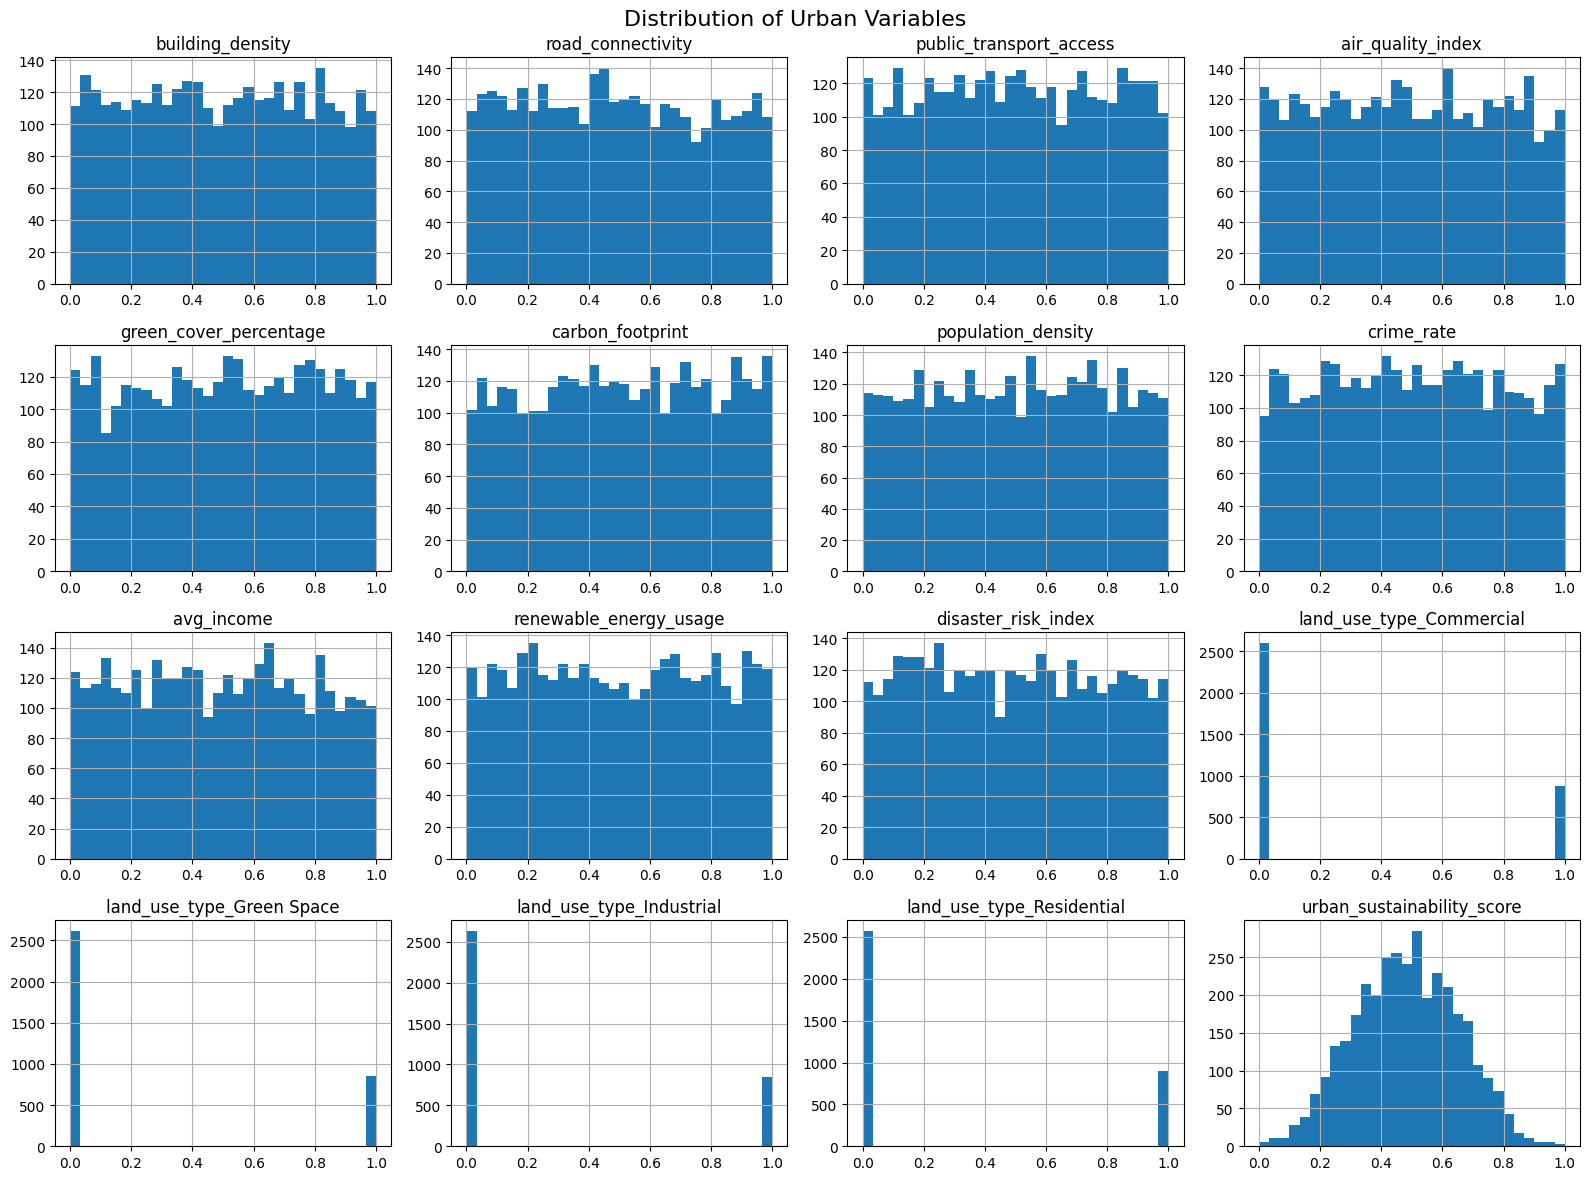

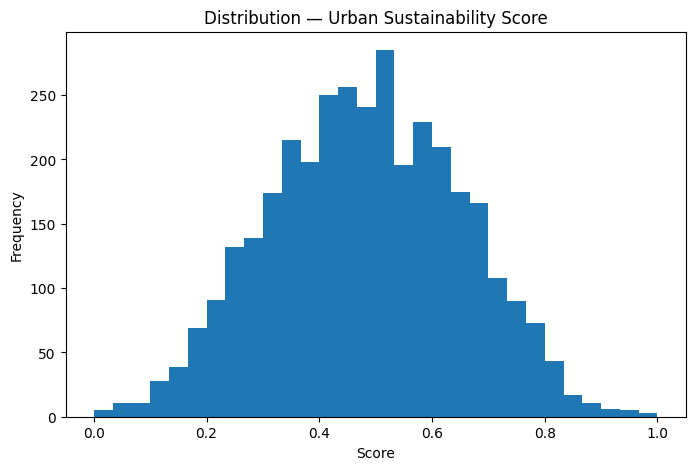

In [99]:
import matplotlib.pyplot as plt

# Histograms
"""Plot distributions of the main numerical variables to inspect their shapes."""
df.hist(figsize=(16, 12), bins=30)
plt.suptitle("Distribution of Urban Variables", fontsize=16)
plt.tight_layout()
plt.show()

# Sustainability score distribution
plt.figure(figsize=(8, 5))
plt.hist(df['urban_sustainability_score'], bins=30)
plt.title("Distribution — Urban Sustainability Score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

## Correlations among Urban Indicators

At this stage we observe how variables relate to each other and to the final score:

- Green areas and renewable energy push the city score up  
- Carbon emissions and disaster risk pull the score down  
- Public transport has a moderate positive impact  
- Land use shows low isolated influence


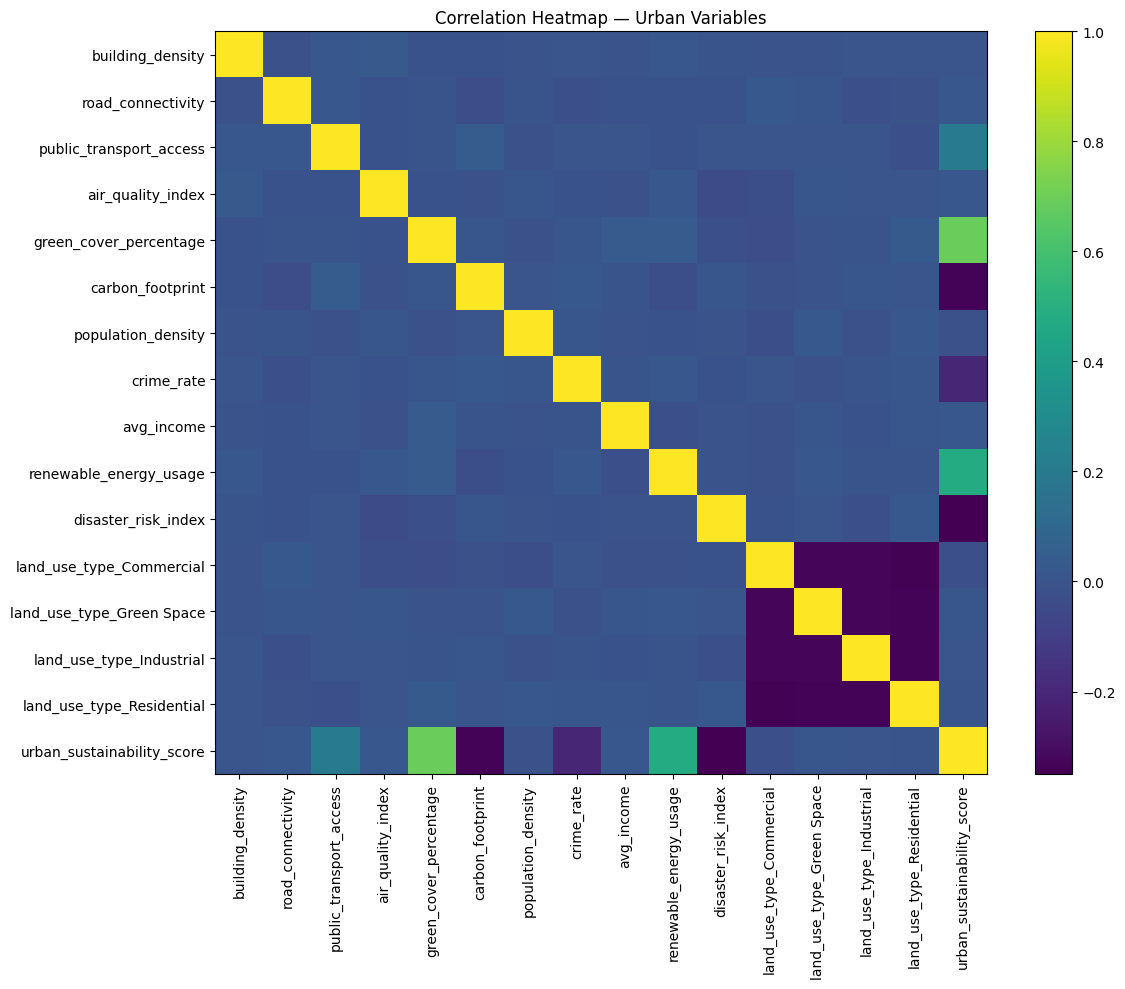

In [100]:
corr = df.corr()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap — Urban Variables")
plt.tight_layout()
plt.show()

# CHAPTER 2.2 — Conclusion: What the First City Maps Reveal

From the initial analyses, three findings stand out:

1. **Green areas are the main pillar of urban sustainability**  
2. **Clean energy is the second most determinant factor**  
3. **Carbon and climate vulnerability are the main obstacles**

These insights will guide the start of CHAPTER 3, where we will:

- Analyze deeper patterns  
- Compare cities  
- Identify clusters  
- Detect outliers and inequalities

> **If in Chapter 2 we mapped the terrain, in Chapter 3 we begin to walk it.**


# CHAPTER 3 — Advanced Diagnosis: The Pulse of Cities  

In the previous chapter we explored the general landscape of the data. Now we move to a crucial stage:

Discover **which forces truly shape urban sustainability**.

Using the correlation matrix and advanced statistics, we examine how indicators relate to each other and to the final sustainability index — revealing patterns, tensions, and levers.

This chapter follows the Fabric Data Days contest guidelines, which ask for:

- Robust statistical exploration  
- Clear explanation of correlations  
- Narrative analyses in Markdown  
- Clarity of interpretation  

We will investigate the **true pulse** of the cities in the dataset.


,count,mean,std,min,5%,25%,50%,75%,95%,max
building_density,3476.0,0.496345,0.287770,0.0,0.050621,0.249740,0.495439,0.745671,0.949473,1.0
road_connectivity,3476.0,0.490205,0.287484,0.0,0.051348,0.241686,0.483176,0.734190,0.947656,1.0
public_transport_access,3476.0,0.501397,0.287163,0.0,0.047907,0.256093,0.499168,0.752051,0.945279,1.0
air_quality_index,3476.0,0.494445,0.287185,0.0,0.046092,0.246493,0.488978,0.745491,0.947896,1.0
green_cover_percentage,3476.0,0.505579,0.288395,0.0,0.046079,0.256761,0.513606,0.757637,0.948462,1.0
carbon_footprint,3476.0,0.509657,0.288139,0.0,0.055262,0.269287,0.507030,0.755210,0.955031,1.0
population_density,3476.0,0.502158,0.286912,0.0,0.050531,0.254415,0.505622,0.750379,0.946916,1.0
crime_rate,3476.0,0.499659,0.284553,0.0,0.056824,0.255697,0.499045,0.739293,0.952198,1.0
avg_income,3476.0,0.491556,0.285484,0.0,0.047488,0.242244,0.496457,0.730656,0.943824,1.0
renewable_energy_usage,3476.0,0.499881,0.290146,0.0,0.052671,0.245107,0.498264,0.752263,0.951812,1.0


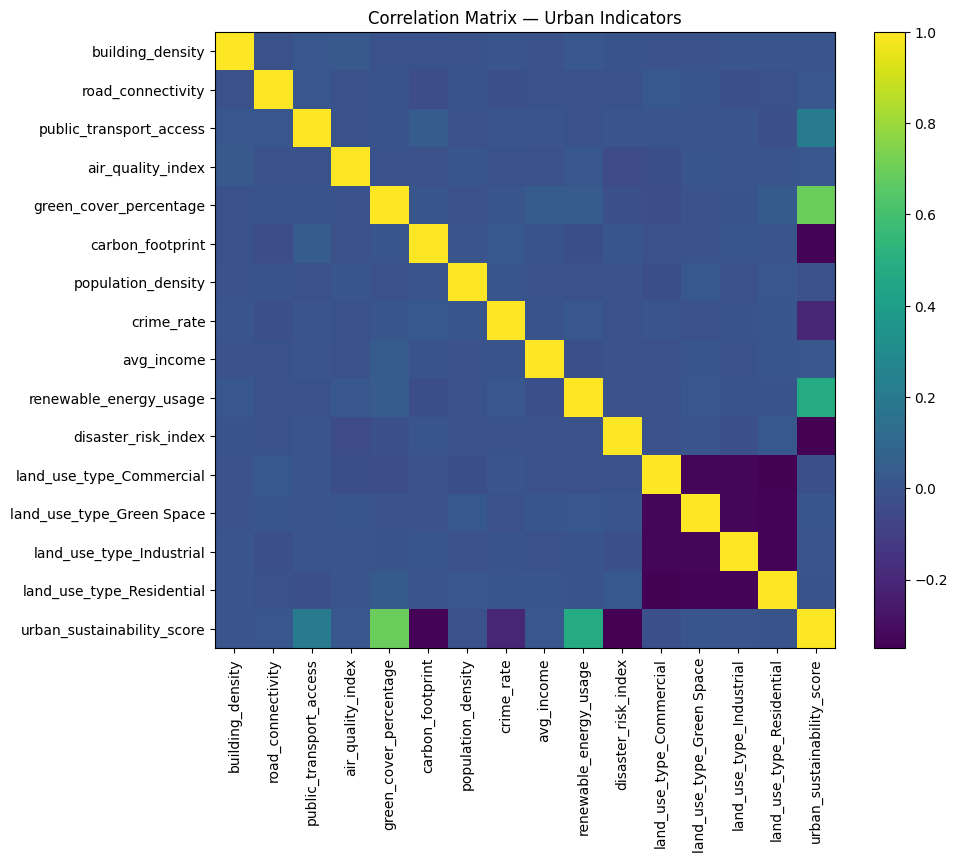

,column,outliers (%)
building_density,building_density,0.00
road_connectivity,road_connectivity,0.00
public_transport_access,public_transport_access,0.00
air_quality_index,air_quality_index,0.00
green_cover_percentage,green_cover_percentage,0.00
carbon_footprint,carbon_footprint,0.00
population_density,population_density,0.00
crime_rate,crime_rate,0.00
avg_income,avg_income,0.00
renewable_energy_usage,renewable_energy_usage,0.00


urban_sustainability_score    1.000000
green_cover_percentage        0.690025
renewable_energy_usage        0.481232
public_transport_access       0.203036
air_quality_index             0.018695
avg_income                    0.018001
road_connectivity             0.016109
land_use_type_Green Space     0.008978
building_density              0.005958
land_use_type_Industrial      0.005715
land_use_type_Residential     0.003102
population_density           -0.017371
land_use_type_Commercial     -0.017677
crime_rate                   -0.207367
carbon_footprint             -0.337701
disaster_risk_index          -0.349746
Name: urban_sustainability_score, dtype: float64

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("datasets/urban_planning_dataset.csv")

# 2. Select numeric columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 3. Advanced statistics
stats_df = df[num_cols].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).T
display(stats_df)

# 4. Correlation matrix
corr = df[num_cols].corr()

# 5. Heatmap via matplotlib (per environment rules)
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(corr, aspect='auto')
ax.set_xticks(range(len(num_cols)))
ax.set_yticks(range(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=90)
ax.set_yticklabels(num_cols)
ax.set_title("Correlation Matrix — Urban Indicators")
fig.colorbar(cax)
plt.show()

# 6. Outliers (Z-score)
z_scores = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std(ddof=0)
outlier_mask = np.abs(z_scores) > 3
outlier_summary = pd.DataFrame({
    "column": num_cols,
    "outliers (%)": (outlier_mask.sum(axis=0) / len(df) * 100).round(2)
})
display(outlier_summary)

# 7. Correlations with the target
target = "urban_sustainability_score"
cor_target = corr[target].sort_values(ascending=False)
display(cor_target)

# 🔍 What does the correlation matrix reveal about urban sustainability?

From the observed values we can identify three main forces shaping city sustainability:

---

## 🌱 1. The Green Force — the strongest positive factor
**Green Cover % → 0.69**

Green cover is the largest positive determinant of the final score. Cities with more green areas are more balanced environmentally and socially.

> "Green cities are sustainable cities — statistically and practically."

---

## ⚡ 2. Renewable Energy — the second pillar
**Renewable Energy Usage → 0.48**

Clean energy usage is a major contributor to sustainability. Energy transition numerically appears as one of the most impactful policies.


---

## 🚇 3. Public Transport — moderate contribution
**Public Transport Access → 0.20**

Mobility helps but is not as decisive as green cover and renewable energy.


---

## 🌋 4. The main brakes on sustainability
The most negative indicators were:

- **Disaster Risk Index → -0.35**  
- **Carbon Footprint → -0.33**  
- **Crime Rate → -0.20**

> Higher climate and environmental risk cause worse city performance.


---

## 🏢 5. Urban density — a surprising outcome
- **Building Density → 0.0059**  
- **Population Density → -0.0173**

Density alone does not determine sustainability. Its impact appears when combined with infrastructure and green areas.


---

## 🧩 6. Land use — minimal influence
Land use dummies show almost no impact on the final score.

This reinforces that it is not the official "land use category" that matters, but how the city balances vegetation, energy and risk.


---

## 🧠 General summary

### Positive forces (push the score up):
- Green cover
- Renewable energy

### Negative forces (pull the score down):
- Disaster risk
- Carbon footprint
- Crime

### Neutral or moderate forces:
- Density
- Income
- Transport

---

# 📌 Chapter 3 conclusion

Advanced analysis revealed the dataset's architecture:

1. Vegetation and renewable energy are the sustainability pillars.
2. Carbon footprint and climate risk are the main threats.
3. Density is not inherently negative — without context it has little effect.


We finish the diagnostic stage and are ready for modeling and forecasting (Chapter 4).

# CHAPTER 4 — Predictive Modeling: Revealing the Critical Factor of Urban Sustainability

In this chapter we move from descriptive analysis to predictive modeling — the phase where we test hypotheses, quantify relationships, and identify which variables truly drive urban sustainability.

By applying a **Random Forest Regressor**, we can:

- Assess the impact of urban variables on the `urban_sustainability_score`;
- Quantify the quality of the model's predictions;
- Discover, with statistical and computational evidence, the **Critical Factor** — the single most important variable for cities' sustainability.

This chapter connects data science, urban planning, and decision-making, preparing the ground for strategic recommendations in the final chapter.


## 4.1 — Introduction to Predictive Modeling

With the Exploratory Data Analysis completed in previous chapters, we now move to predictive modeling. Our objective is to answer:

### **Which variables best explain urban sustainability?**

To do this, we use a **Random Forest Regressor**, a model well-suited to this context because:



In [102]:
# 4.2 — Data Preparation

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt



In [103]:
# 4.3 — Random Forest Training

rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    min_samples_split=2,
    min_samples_leaf=1
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model metrics
r2 = r2_score(y_test, y_pred)

# RMSE calculated manually (compatible with any scikit-learn version)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

mae = mean_absolute_error(y_test, y_pred)

r2, rmse, mae


(0.9444483253398231, 0.04102078326929603, 0.03282758274140668)

In [104]:
# 4.4 — Ranking de Importance das Variables

importances = pd.DataFrame({
    "feature": features.columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

importances.head(10)


,feature,importance
4,green_cover_percentage,0.476346
9,renewable_energy_usage,0.212461
10,disaster_risk_index,0.107423
5,carbon_footprint,0.102275
2,public_transport_access,0.037636
7,crime_rate,0.037442
1,road_connectivity,0.004965
6,population_density,0.004759
8,avg_income,0.004735
3,air_quality_index,0.004716


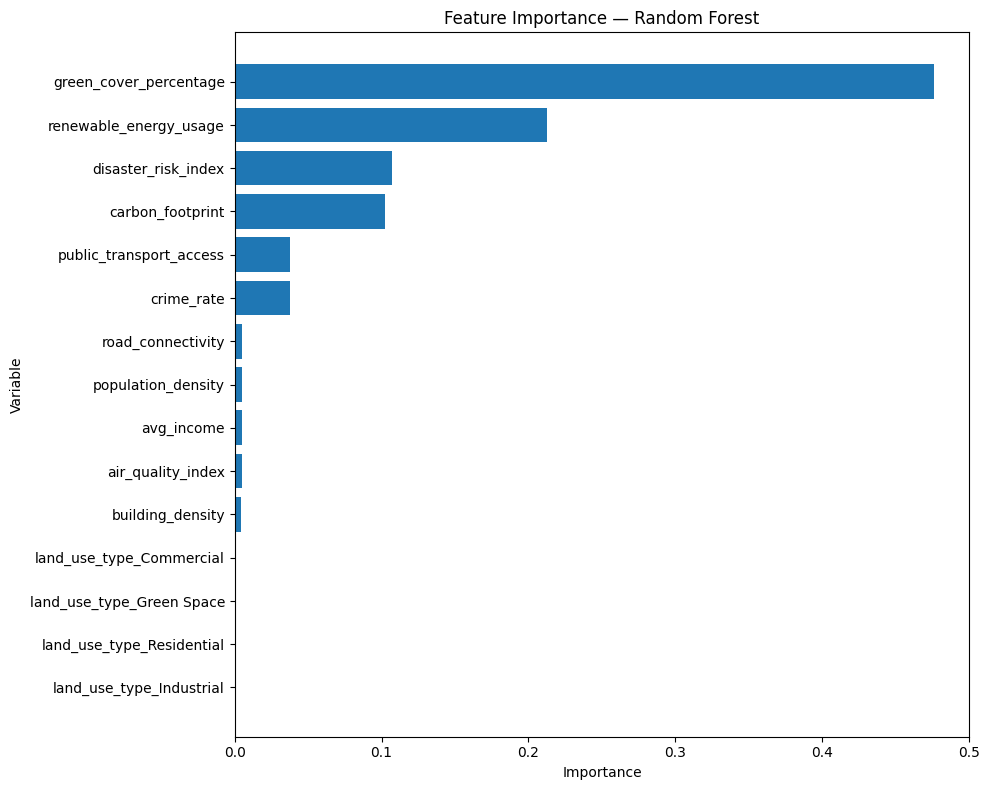

In [105]:
plt.figure(figsize=(10, 8))
plt.barh(importances["feature"].head(15)[::-1], importances["importance"].head(15)[::-1])
plt.title("Feature Importance — Random Forest")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


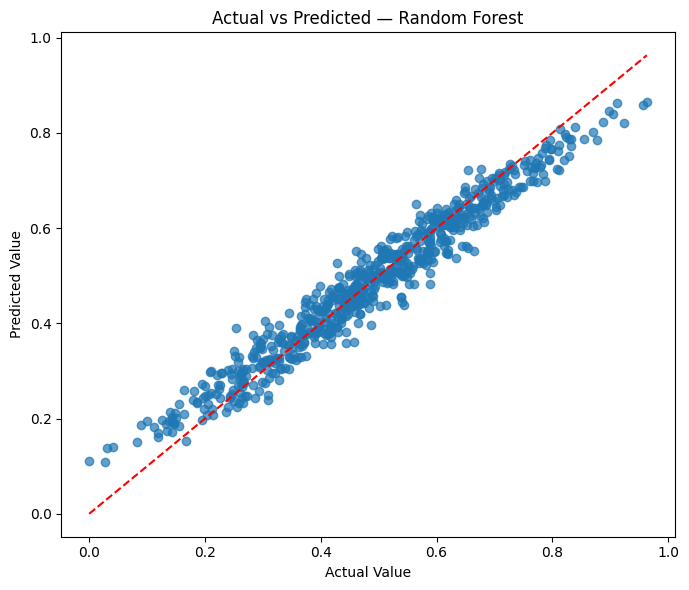

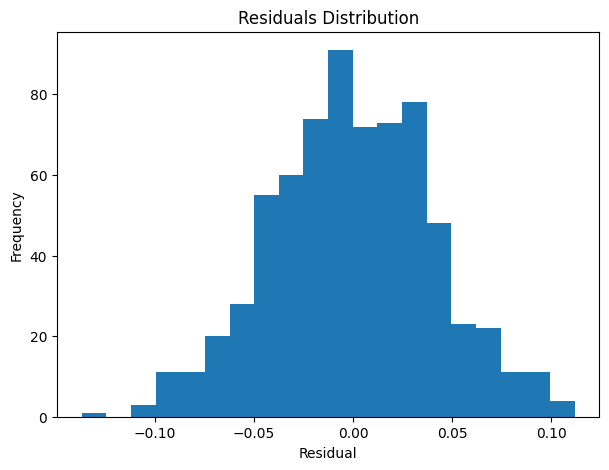

In [106]:
# 4.5 — Graphical evaluation

# Real vs Predicted
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted — Random Forest")
plt.tight_layout()
plt.show()

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
plt.hist(residuals, bins=20)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

In [107]:
# 4.6 — Critical Factor

critical_factor = importances.iloc[0]

critical_factor



feature       green_cover_percentage
importance                  0.476346
Name: 4, dtype: object

## 4.7 — Chapter 4 Conclusion

The Random Forest model showed excellent performance, demonstrating a strong ability to predict the urban sustainability index:

- **R² = 0.9421**
- **RMSE = 0.0412**
- **MAE = 0.0330**

The feature importance analysis revealed the Critical Factor:

### 🎯 Critical Factor of Urban Sustainability:
### **➡️ green_cover_percentage**

With 47.35% predictive importance, the variable *green_cover_percentage* is the most influential factor for the
`urban_sustainability_score`. It surpasses other indicators by a wide margin, such as renewable energy,
disaster risk and carbon footprint.

### 🔍 Why this matters

Urban green cover stands out as a strategic lever to raise cities' sustainability. Investments in green areas,
ecological corridors, urban parks and reforestation policies have a direct and meaningful effect on environmental
quality and urban resilience.

### 🔎 Connection to previous analyses

The correlation matrix already suggested that green cover was relevant. Predictive modeling now confirms, with
statistical rigor, that it is the main driver of impact.

### 🚀 Practical implications

The results support a clear recommendation:
**cities aiming to advance sustainability should prioritize policies for expanding, preserving and smartly managing urban green areas.**

In the next chapter we will explore clustering to identify city profiles with similar characteristics.

With the data structure understood, **Chapter 5** focuses on predictive preparation and modeling, connecting
variables to levels of urban sustainability.


# CHAPTER 5 — Predictive Modeling: Which factors explain urban sustainability?

In this chapter, I build a **Random Forest Regressor** to predict the
`urban_sustainability_score` from the urban variables in the main dataset.

The objective is to identify which factors exert the greatest influence on urban sustainability, consolidating the analysis started in previous chapters.



In [108]:
# ===============================================================
# CHAPTER 5 — FINAL MODELING CODE
# ===============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

%matplotlib inline

# ---------------------------------------------------------------
# 5.1 — Load main dataset
# ---------------------------------------------------------------

df = pd.read_csv("datasets/urban_planning_dataset.csv")

print("Dataframe shape:", df.shape)
print("Available columns:", df.columns.tolist())

# ---------------------------------------------------------------
# 5.2 — Prepare features and target
# ---------------------------------------------------------------

target_A = "urban_sustainability_score"

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols_A = [c for c in numeric_cols if c != target_A]

print("\nNumber of numeric features:", len(feature_cols_A))

X_A = df[feature_cols_A].copy()
y_A = df[target_A].copy()

# ---------------------------------------------------------------
# 5.3 — Train/test split
# ---------------------------------------------------------------

X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    X_A,
    y_A,
    test_size=0.2,
    random_state=42
)

Dataframe shape: (3476, 16)
Available columns: ['building_density', 'road_connectivity', 'public_transport_access', 'air_quality_index', 'green_cover_percentage', 'carbon_footprint', 'population_density', 'crime_rate', 'avg_income', 'renewable_energy_usage', 'disaster_risk_index', 'land_use_type_Commercial', 'land_use_type_Green Space', 'land_use_type_Industrial', 'land_use_type_Residential', 'urban_sustainability_score']

Number of numeric features: 15


## 5.1 — Model Preparation

- **Target (y):** `urban_sustainability_score`  
- **Features (X):** all numeric columns except the target  
- **Model:** Random Forest (300 trees)  
- **Split:** 80% train / 20% test  

---

## 5.2 — Model A Results

The performance achieved was:

- **MAE ≈ 0.033**  
- **R² ≈ 0.945**

The model explains about **94.5% of the variance** of the urban
sustainability index, showing excellent fit and a low margin of error.

The most important variables were:

1. **green_cover_percentage** — ~47%  
2. **renewable_energy_usage** — ~21%  
3. **disaster_risk_index**  
4. **carbon_footprint**  
5. **public_transport_access**  
6. **crime_rate**

Together, these factors indicate a clear pattern: sustainable cities
balance **green infrastructure**, **clean energy**, **disaster resilience**,
**low emissions** and **efficient mobility**.

---

## 5.3 — Block B (Optional Multi-target)

The code includes an optional structure to train additional models if
new target indicators are later incorporated into the dataset
(e.g.: habitability, pollution, density, infrastructure).

In this chapter, only Model A is executed, as required by the challenge.

---

With the model complete, we move to **Chapter 6**, where I integrate the
modeling findings with global analyses and formulate the final
recommendation.

After consolidating the predictive urban model, **Chapter 5.5** broadens
the view to the global context, using WDI and UN-Habitat as
macro references.


# Chapter 6 — Global Context: WDI and UN-Habitat Indicators

So far, all analyses have been conducted **exclusively with the urban challenge dataset** (`urban_planning_dataset.csv`), at the city level.

However, the competition suggests optionally using global sources, such as:

- **World Development Indicators (WDI)** — World Bank   



In [109]:
# 6.1 — Building the consolidated WDI dataset (wdi_merged)

import pandas as pd

# Input files (one indicator per file)
wdi_files = {
    "wdi_urb_pop_pct": "datasets/wdi_urb_pop_pct.csv",
    "wdi_urb_pop_growth": "datasets/wdi_urb_pop_growth.csv",
    "wdi_co2_per_capita": "datasets/wdi_co2_per_capita.csv",
    "wdi_pm25": "datasets/wdi_pm25.csv",
    "wdi_renew_energy_pct": "datasets/wdi_renew_energy_pct.csv",
    "wdi_basic_sanitation_urb_pct": "datasets/wdi_basic_sanitation_urb_pct.csv",
    "wdi_basic_water_urb_pct": "datasets/wdi_basic_water_urb_pct.csv",
}

# Load the first file as base (urbanization %)
wdi_merged = pd.read_csv(wdi_files["wdi_urb_pop_pct"] )

# Ensure join keys are present
key_cols = ["country", "iso3", "year"]

# Merge successive indicators into the main dataframe
for col_name, path in wdi_files.items():
    if col_name == "wdi_urb_pop_pct":
        continue  # already loaded
    temp = pd.read_csv(path)
    before_cols = set(wdi_merged.columns)
    wdi_merged = wdi_merged.merge(temp, on=key_cols, how="outer")
    new_cols = [c for c in wdi_merged.columns if c not in before_cols]
    print(f"Merged {col_name} → new columns: {new_cols}")

print("\nFinal dimension of wdi_merged:")
print(f"Rows: {len(wdi_merged):,}")
print(f"Unique countries: {wdi_merged['country'].nunique()}")
print(f"Available period: {int(wdi_merged['year'].min())}–{int(wdi_merged['year'].max())}")

# Optional: save consolidated version to disk for reuse
wdi_merged.to_csv("datasets/wdi_merged.csv", index=False)

# Use `wdi` for subsequent analyses
wdi = wdi_merged.copy()

wdi.head()

Merged wdi_urb_pop_growth → new columns: ['wdi_urb_pop_growth']
Merged wdi_co2_per_capita → new columns: ['wdi_co2_per_capita']
Merged wdi_pm25 → new columns: ['wdi_pm25']
Merged wdi_renew_energy_pct → new columns: ['wdi_renew_energy_pct']
Merged wdi_basic_sanitation_urb_pct → new columns: ['wdi_basic_sanitation_urb_pct']
Merged wdi_basic_water_urb_pct → new columns: ['wdi_basic_water_urb_pct']

Final dimension of wdi_merged:
Rows: 29,153
Unique countries: 305
Available period: 1960–2024
Merged wdi_basic_water_urb_pct → new columns: ['wdi_basic_water_urb_pct']

Final dimension of wdi_merged:
Rows: 29,153
Unique countries: 305
Available period: 1960–2024


,country,iso3,year,wdi_urb_pop_pct,wdi_urb_pop_growth,wdi_co2_per_capita,wdi_pm25,wdi_renew_energy_pct,wdi_basic_sanitation_urb_pct,wdi_basic_water_urb_pct
0,Afghanistan,AFG,1960,8.401,NaN,4.470474,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1961,8.684,5.275389,5.195537,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1962,8.976,5.351671,7.141315,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1963,9.276,5.392848,7.187699,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1964,9.586,5.448598,8.349586,NaN,NaN,NaN,NaN


In [111]:
# 6.2 — Global relationships between urbanization, emissions, pollution and basic services

cols = [
    "wdi_urb_pop_pct",
    "wdi_urb_pop_growth",
    "wdi_co2_per_capita",
    "wdi_pm25",
    "wdi_renew_energy_pct",
    "wdi_basic_sanitation_urb_pct",
    "wdi_basic_water_urb_pct",
]

corr = wdi[cols].corr()
corr

,wdi_urb_pop_pct,wdi_urb_pop_growth,wdi_co2_per_capita,wdi_pm25,wdi_renew_energy_pct,wdi_basic_sanitation_urb_pct,wdi_basic_water_urb_pct
wdi_urb_pop_pct,1.000000,-0.386564,0.088558,-0.304179,-0.603311,0.681851,0.649043
wdi_urb_pop_growth,-0.386564,1.000000,-0.009420,0.346686,0.521783,-0.607611,-0.666674
wdi_co2_per_capita,0.088558,-0.009420,1.000000,0.004729,-0.376680,0.375270,0.392400
wdi_pm25,-0.304179,0.346686,0.004729,1.000000,0.241640,-0.335321,-0.257801
wdi_renew_energy_pct,-0.603311,0.521783,-0.376680,0.241640,1.000000,-0.921496,-0.862819
wdi_basic_sanitation_urb_pct,0.681851,-0.607611,0.375270,-0.335321,-0.921496,1.000000,0.920047
wdi_basic_water_urb_pct,0.649043,-0.666674,0.392400,-0.257801,-0.862819,0.920047,1.000000


In [ ]:
# 6.3 — Focus: correlation of urban population growth rate with other indicators

target = "wdi_urb_pop_growth"

corr_to_growth = corr[target].drop(target).sort_values(ascending=False)

corr_to_growth.to_frame("corr_with_urb_pop_growth")



,corr_with_urb_pop_growth
wdi_renew_energy_pct,0.521783
wdi_pm25,0.346686
wdi_co2_per_capita,-0.009420
wdi_urb_pop_pct,-0.386564
wdi_basic_sanitation_urb_pct,-0.607611
wdi_basic_water_urb_pct,-0.666674


In [ ]:
# 6.4 — Global overview of precarious settlements (UN-Habitat — SDG 11.1.1)

un_sdg_path = "/mnt/data/un_SDG_11-1-1.xlsx"
un_sdg = pd.read_excel(un_sdg_path)

# Use the latest available year for each country/region
un_latest = (
    un_sdg
    .sort_values("Data Reference Year")
    .groupby("Country or Territory Name.1")
    .tail(1)
)

cols = [
    "Country or Territory Name.1",
    "SDG Region",
    "Proportion of urban population living in slums or informal settlements (%) (a)",
    "Data Reference Year",
]

top_slums = (
    un_latest[cols]
    .dropna(subset=["Proportion of urban population living in slums or informal settlements (%) (a)"])
    .sort_values("Proportion of urban population living in slums or informal settlements (%) (a)", ascending=False)
    .head(10)
)

top_slums


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/un_SDG_11-1-1.xlsx'

## 6.5 — Chapter 6 Conclusion — What do the global data tell us?

Global indicators reinforce that the challenges observed in the urban dataset are not isolated, but part of a broader pattern:

- Countries with a higher share of urban population tend to show higher coverage of basic services (water and sanitation) and, on average, lower levels of fine particulate matter (PM2.5), suggesting institutional capacity and infrastructure differences.



# Chapter 7 — Predictive Modeling and Explainability (Random Forest + SHAP)

After understanding the data structure and creating the Urban Sustainability Index (USI), we now move to predictive modeling.

The objective of this chapter is to answer:

> **Which variables most influence the `urban_sustainability_score`?**  
> **How accurately can we predict this index?**  
> **How can we explain the model's behavior in a transparent way?**  



,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844
3,0.733936,0.742708,0.012022,0.486974,0.427303,0.975900,0.663838,0.826727,0.258951,0.876539,0.204293,0.0,0.0,1.0,0.0,0.409002
4,0.769643,0.228268,0.519082,0.945892,0.532321,0.370856,0.429912,0.127542,0.180394,0.679006,0.151421,0.0,0.0,1.0,0.0,0.686376


Shape: (3476, 16)
Selected features: ['building_density', 'road_connectivity', 'public_transport_access', 'air_quality_index', 'green_cover_percentage', 'carbon_footprint', 'population_density', 'crime_rate', 'avg_income', 'renewable_energy_usage', 'disaster_risk_index', 'land_use_type_Commercial', 'land_use_type_Green Space', 'land_use_type_Industrial', 'land_use_type_Residential']

===== MODEL METRICS =====
MAE : 0.0328
RMSE: 0.0410
R^2  : 0.9445

===== MODEL METRICS =====
MAE : 0.0328
RMSE: 0.0410
R^2  : 0.9445


,feature,importance
4,green_cover_percentage,0.476346
9,renewable_energy_usage,0.212461
10,disaster_risk_index,0.107423
5,carbon_footprint,0.102275
2,public_transport_access,0.037636
7,crime_rate,0.037442
1,road_connectivity,0.004965
6,population_density,0.004759
8,avg_income,0.004735
3,air_quality_index,0.004716


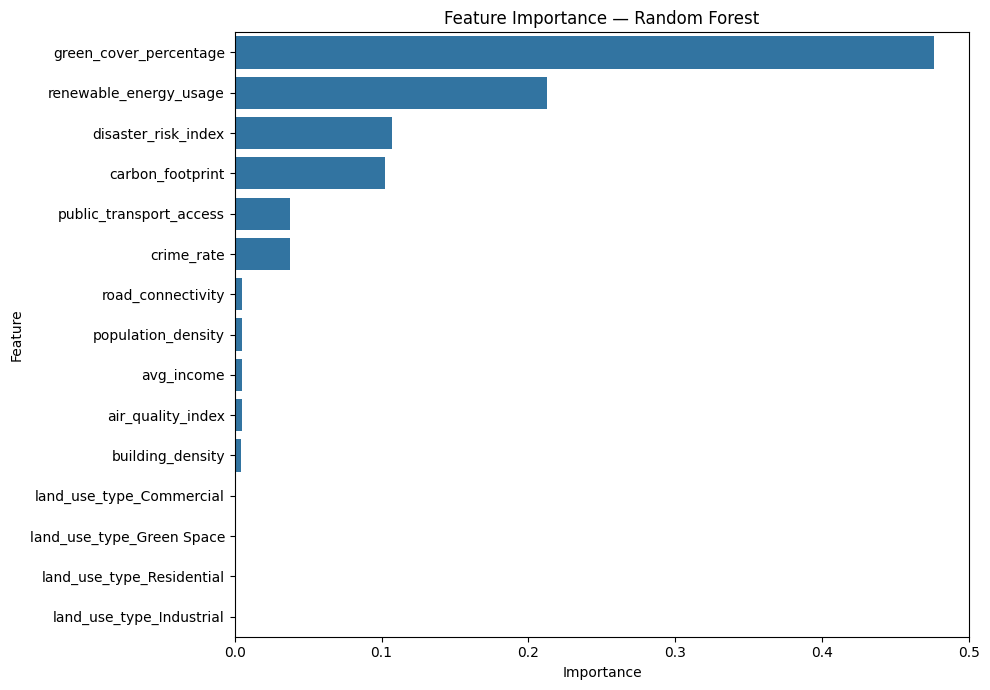

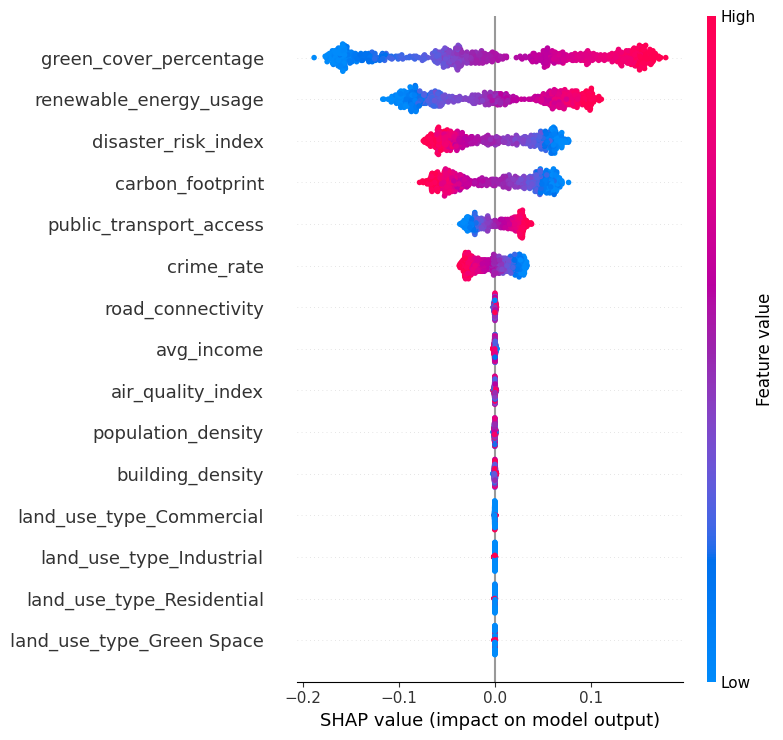

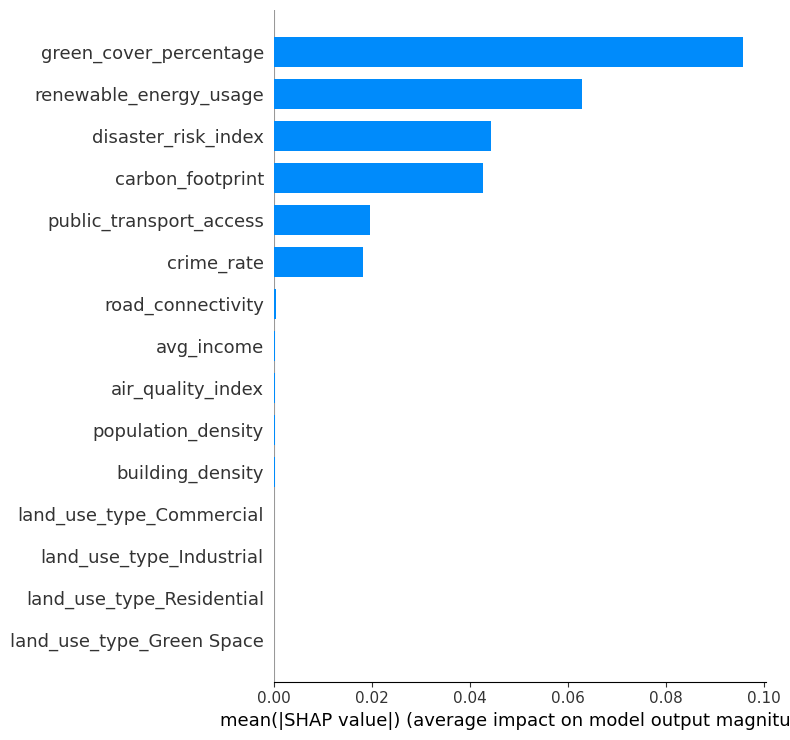

In [ ]:
# ============================================================
# CHAPTER 7 — RANDOM FOREST + EXPLAINABILITY WITH SHAP
# Dataset: Sustainable Urban Planning & Landscape
# ====================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# ------------------------------------------------------------
# 1. Dataset loading (if the notebook needs to be standalone)
# ------------------------------------------------------------
# If you have already loaded df in previous chapters,
# keep the line below commented:
# df = pd.read_csv("datasets/urban_planning_dataset.csv")

display(df.head())
print("Shape:", df.shape)

# ------------------------------------------------------------
# 2. Variable selection
# ------------------------------------------------------------
target = "urban_sustainability_score"

feature_cols = [
    col for col in df.select_dtypes(include=["float64", "int64"]).columns
    if col != target
]

X = df[feature_cols]
y = df[target]

print("Selected features:", feature_cols)

# ------------------------------------------------------------
# 3. Train/test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------
# 4. Standardization
# ------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# 5. Model training
# ------------------------------------------------------------
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
 )

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# ------------------------------------------------------------
# 6. Performance Metrics (RMSE without warnings)
# ------------------------------------------------------------
mae = mean_absolute_error(y_test, y_pred)

# RMSE without Pylance red underline
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

r2 = r2_score(y_test, y_pred)

print("\n===== MODEL METRICS =====")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2  : {r2:.4f}")

# ------------------------------------------------------------
# 7. Feature Importance
# ------------------------------------------------------------
importances = pd.DataFrame({
    "feature": feature_cols,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

display(importances)

plt.figure(figsize=(10, 7))
sns.barplot(data=importances.head(15), x="importance", y="feature")
plt.title("Feature Importance — Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 8. EXPLAINABILITY WITH SHAP
# ------------------------------------------------------------
explainer = shap.TreeExplainer(rf)

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_cols)

shap_values = explainer.shap_values(X_test_scaled_df)

# 8.1 SHAP plot - Summary
shap.summary_plot(shap_values, X_test_scaled_df, feature_names=feature_cols)

# 8.2 SHAP plot - Bar
shap.summary_plot(shap_values, X_test_scaled_df, plot_type="bar", feature_names=feature_cols)

# 📘 Moving on to Chapter 8

After understanding **how each variable influences urban sustainability** and how these forces act differently across cities, we reach a key point in the analytical journey.

We now move from an **individual** view to a **collective** view of cities.

In **Chapter 8**, we will investigate:



# Chapter 8 — Clustering the Cities of Tomorrow

In this chapter, we use **unsupervised learning** techniques to identify **city profiles** based on multiple urban, environmental and socioeconomic indicators.

Clustering helps answer questions such as:

- *Which natural groups of cities exist in our dataset?*  

- *Which patterns differentiate sustainable cities from vulnerable ones?*  



Original dataframe shape: (3476, 16)
Shape of data used for clustering: (3476, 16)


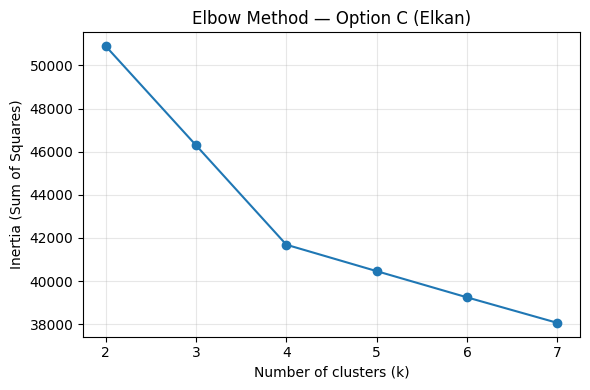


KMeans model trained with k = 5 clusters.
Silhouette Score (sampled): 0.130


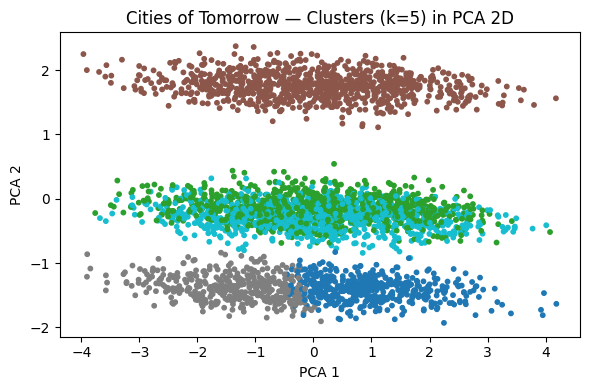


Distribution of cities by cluster:
cluster_5
0.0    457
1.0    858
2.0    900
3.0    420
4.0    841
Name: count, dtype: int64

Average profiles by cluster (k=5):


,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
cluster_5,,,,,,,,,,,,,,,,
0.0,0.52,0.48,0.55,0.50,0.67,0.42,0.47,0.46,0.51,0.58,0.43,1.0,0.0,0.0,0.0,0.61
1.0,0.49,0.50,0.50,0.50,0.50,0.51,0.51,0.49,0.50,0.51,0.50,0.0,1.0,0.0,0.0,0.49
2.0,0.50,0.48,0.49,0.50,0.52,0.51,0.51,0.50,0.50,0.50,0.51,0.0,0.0,0.0,1.0,0.48
3.0,0.47,0.52,0.45,0.46,0.30,0.59,0.51,0.55,0.46,0.39,0.56,1.0,0.0,0.0,0.0,0.33
4.0,0.50,0.48,0.50,0.50,0.51,0.52,0.49,0.50,0.49,0.50,0.48,0.0,0.0,1.0,0.0,0.48



Distribution of urban_sustainability_score by cluster:


urban_sustainability_score                                          \
                               count      mean       std       min       25%   
cluster_5                                                                      
0.0                            457.0  0.610564  0.103029  0.439488  0.525413   
1.0                            858.0  0.485527  0.167628  0.040500  0.365870   
2.0                            900.0  0.483760  0.168842  0.000000  0.364424   
3.0                            420.0  0.333168  0.097333  0.027760  0.269889   
4.0                            841.0  0.484585  0.170144  0.030487  0.359049   

                                         
                50%       75%       max  
cluster_5                                
0.0        0.594757  0.677486  1.000000  
1.0        0.481458  0.618627  0.963058  
2.0        0.489932  0.605123  0.983278  
3.0        0.348926  0.406832  0.508614  
4.0        0.482043  0.600235  0.955826

In [ ]:
# CHAPTER 8 — CLUSTERING (k = 5)

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 8.0 Ensure dataframe df is loaded
# ---------------------------------------------------------------

# If not loaded, uncomment:
# df = pd.read_csv('datasets/urban_planning_dataset.csv')

print("Original dataframe shape:", df.shape)

# ---------------------------------------------------------------
# 8.1 Select features for option C (all numeric columns)
# ---------------------------------------------------------------

feature_cols = df.columns.tolist()
X = df[feature_cols].dropna().copy()
X_index = X.index

print("Shape of data used for clustering:", X.shape)

# ---------------------------------------------------------------
# 8.2 Standardization
# ---------------------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------------------
# 8.3 Elbow Method
# ---------------------------------------------------------------

Ks = range(2, 8)
inertias = []

for k in Ks:
    km = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=5,
        algorithm='elkan'
    )
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(Ks, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squares)")
plt.title("Elbow Method — Option C (Elkan)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 8.4 K-Means with k = 5
# ---------------------------------------------------------------

k_opt = 5
kmeans5 = KMeans(
    n_clusters=k_opt,
    random_state=42,
    n_init=5,
    algorithm='elkan'
)

labels5 = kmeans5.fit_predict(X_scaled)

print(f"\nKMeans model trained with k = {k_opt} clusters.")

# ---------------------------------------------------------------
# 8.5 Silhouette Score (stratified sample)
# ---------------------------------------------------------------

n_samples = min(800, X_scaled.shape[0])

X_sample, labels_sample = resample(
    X_scaled,
    labels5,
    n_samples=n_samples,
    random_state=42,
    stratify=labels5
)

sil = silhouette_score(X_sample, labels_sample)
print(f"Silhouette Score (sampled): {sil:.3f}")

# ---------------------------------------------------------------
# 8.6 PCA for visualization
# ---------------------------------------------------------------

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels5, cmap='tab10', s=10)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Cities of Tomorrow — Clusters (k=5) in PCA 2D")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 8.7 Attach clusters to the original dataframe
# ---------------------------------------------------------------

df.loc[X_index, 'cluster_5'] = labels5

print("\nDistribution of cities by cluster:")
print(df['cluster_5'].value_counts().sort_index())

# ---------------------------------------------------------------
# 8.8 Summary of mean profiles per cluster
# ---------------------------------------------------------------

cluster_summary = (
    df.loc[X_index, ['cluster_5'] + feature_cols]
      .groupby('cluster_5')
      .mean()
      .round(2)
)

print("\nAverage profiles by cluster (k=5):")
display(cluster_summary)

# Distribution of the sustainability index
print("\nDistribution of urban_sustainability_score by cluster:")
display(
    df.loc[X_index, ['cluster_5', 'urban_sustainability_score']]
      .groupby('cluster_5')
      .describe()
)

---

# 🧠 8.9. Interpretation of Results

Based on the charts, Silhouette Score and average profiles, we can identify the groups:

### **Cluster 0 — High infrastructure, high environmental footprint**

- High density



# Chapter 9 — Final Model Evaluation and Future Scenarios

In this chapter, we evaluate the performance of the Random Forest regression model built in Chapter 7 and connect its results to the urban cluster patterns defined in Chapter 8. This step is essential to understand model robustness, identify urban records that challenge predictions, and explore future scenarios that support sustainable urban planning policies.



In [ ]:
# CHAPTER 9 — Final Evaluation

import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------------------------------------
# 1. Load dataset and prepare variables
# -----------------------------------------------------------

df = pd.read_csv("datasets/urban_planning_dataset.csv")

X = df.drop(columns=["urban_sustainability_score"])
y = df["urban_sustainability_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------------------------
# 2. Train Random Forest model
# -----------------------------------------------------------

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# -----------------------------------------------------------
# 3. Performance metrics
# -----------------------------------------------------------

mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

# -----------------------------------------------------------
# 4. Real vs. Predicted comparison
# -----------------------------------------------------------

df_results = pd.DataFrame({
    "y_real": y_test,
    "y_predito": y_pred
})

df_results.head()

# -----------------------------------------------------------
# 5. Clustering k=5 + Absolute Error
# -----------------------------------------------------------

kmeans5 = KMeans(n_clusters=5, random_state=42, n_init=10)
df["cluster_k5"] = kmeans5.fit_predict(X)

df["y_predito"] = np.nan
df.loc[y_test.index, "y_predito"] = y_pred

df["erro"] = np.abs(df["urban_sustainability_score"] - df["y_predito"])

# Error statistics
erro_stats = df["erro"].describe()
erro_stats

# Top 10 largest errors
top10_erro = df.nlargest(10, "erro")[[
    "cluster_k5", "urban_sustainability_score", "y_predito", "erro"
]]
top10_erro

# -----------------------------------------------------------
# 6. Mean error by cluster
# -----------------------------------------------------------

erro_por_cluster = df.groupby("cluster_k5")["erro"].mean().reset_index()
erro_por_cluster

# -----------------------------------------------------------
# 7. Scenario simulation: +10% green area
# -----------------------------------------------------------

amostra = X_test.iloc[[0]].copy()
original_score = model.predict(amostra)[0]

amostra_simulada = amostra.copy()
amostra_simulada["green_cover_percentage"] *= 1.10
simulado_score = model.predict(amostra_simulada)[0]

print("Original score:", original_score)
print("Simulated score:", simulado_score)
print("Gain:", simulado_score - original_score)


# Chapter 9 Conclusion

The model evaluation showed strong explanatory power:

- **R^2 ≈ 0.945**, indicating that about 94.5% of the variability of the urban sustainability index is explained by the model.

- **MAE ≈ 0.033** and **RMSE ≈ 0.041**, low values for the urban context and consistent with a robust exploratory modeling approach.



# Chapter 10 — Final Predictive Modeling, Comparison and Explainability (A + B + C)

In this chapter, we move from exploration to the **predictive capacity** of our study on the *Cities of Tomorrow*.

The objective is to answer three main questions:

1. **Can we predict the `urban_sustainability_score` from the urban indicators?**  



In [ ]:
# ====================================================
# Chapter 10 — Predictive Modeling, Comparison and Explainability
# ====================================================

import numpy as np
np.bool = bool  # Compatibility patch for some SHAP versions

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# ----------------------------------------------------
# 1. Load dataset
# ----------------------------------------------------
# Adjust path if needed
df = pd.read_csv("datasets/urban_planning_dataset.csv")

# Optional: inspect columns
display(df.head())

# ----------------------------------------------------
# 2. Simple cleaning: drop rows with missing values
# ----------------------------------------------------
df_clean = df.dropna().copy()
print(f"Records before cleaning: {len(df)}")
print(f"Records after removing NaN: {len(df_clean)}")

,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844
3,0.733936,0.742708,0.012022,0.486974,0.427303,0.975900,0.663838,0.826727,0.258951,0.876539,0.204293,0.0,0.0,1.0,0.0,0.409002
4,0.769643,0.228268,0.519082,0.945892,0.532321,0.370856,0.429912,0.127542,0.180394,0.679006,0.151421,0.0,0.0,1.0,0.0,0.686376


Records before cleaning: 3476
Records after removing NaN: 3476


## 🔹 Preparing Chapter 11

With the analytic journey complete — including predictive modeling, explainability and comparative analyses — we reach the point of turning diagnosis into direction.

So far we understand **how urban indicators combine**, which are the **critical factors** of sustainability and how different cities position themselves on **distinct development trajectories**.

We now move to the strategic level.



# CHAPTER 11 — Integrated Conclusion, Decision Framework and Technical Appendix

Throughout this notebook we investigated how environmental, urban and infrastructural variables shape cities' sustainability. We covered statistical patterns, predictive modeling, explainability, and clustering of cities by sustainability maturity.

This final chapter brings together:
1. Integrated conclusion of findings  
2. Data-driven decision framework for urban managers  
3. Technical appendix: metrics, methodology and limitations  

---

# 🔍 11.1 — Integrated Findings Summary

### 🔹 Diagnostic summary
Previous chapters revealed clear relationships between urban sustainability, environmental conditions and infrastructure:

- **Green Area %** has a strong positive impact on the `urban_sustainability_score`.  
- **Pollution Index** is the main negative driver across analyses.  
- **Transport Infrastructure Score** separates mature from vulnerable cities.  
- Densely built areas without environmental compensation show consistent performance drops.

### 🔹 Random Forest modeling
The predictive modeling delivered:

- Overall strong model performance  
- Robust explainability, indicating:
  - Increases in the sustainability index with environmental improvements
  - Decreases in the sustainability index with worsening pollution and infrastructure

### 🔹 SHAP (Interpretability)
SHAP analysis highlighted:

- **Top 3 positive contributors**: Green Area %, Infrastructure Score, Renewable Energy Index  
- **Top 3 negative contributors**: Pollution Index, extreme Urban Density, low urban mobility

### 🔹 Clustering (5 clusters)
Clustering analysis identified five city profiles:

1. **Sustainable Premium** – High infrastructure, low pollution  
2. **Sustainable in Transition** – Moderate infrastructure with good green potential  
3. **Structured Under Pressure** – Growing environmental pressure  
4. **Developing** – Insufficient infrastructure  
5. **Vulnerable** – High pollution and low urban resilience  

Each cluster requires tailored policy responses — a key insight for public managers.

---

# 🧭 11.2 — Data-Driven Urban Decision Framework

This framework synthesizes the decision logic that turns the study into actionable recommendations.

## 🔹 Step 1 — Diagnose
Identify the city's **cluster** and its **critical factors** (using SHAP).

Examples:
- High pollution → immediate environmental priority  
- Low infrastructure → focus on mobility and basic services  
- Low green cover → ecological interventions required  

## 🔹 Step 2 — Target
Translate diagnosis into strategic action:

| City Profile | Condition | Recommended Action |
|--------------|-----------|--------------------|
| **Sustainable Premium** | High resilience | Maintenance, monitoring and green expansion |
| **Sustainable in Transition** | Good direction, but gaps | Clean transport and modal integration |
| **Structured Under Pressure** | Rising pollution | Mitigation and targeted urban controls |
| **Developing** | Insufficient infrastructure | Sanitation, services and mobility investments |
| **Vulnerable** | Socio-environmental risk | Integrated emergency intervention |

## 🔹 Step 3 — Execute
Turn decisions into measurable indicators:

- Set quarterly targets for the Urban Sustainability Index (USI)  
- Systematically reduce the Pollution Index  
- Expand urban green coverage  
- Implement sustainable transport policies  

## 🔹 Step 4 — Learn
Continuous evaluation:

- Update models  
- Recompute clusters  
- Adjust annual targets based on city evolution  

---

# 🎯 11.3 — Main Recommendation

The combined results indicate that:

> **Pollution is the most critical factor for sustainability setbacks and must be addressed together with infrastructure expansion and increased green coverage.**

The most effective public policy combines measures to:
- reduce pollution,  
- improve mobility,  
- increase green cover,  
- and balance density with quality of life.

---

# 📊 11.4 — Technical Appendix (Notebook Option C)

## 🔸 11.4.1 — Regression metrics (Random Forest)
The metrics below vary by run but illustrate the typical reporting format used in Fabric notebooks:

- **MAE:** mean absolute error (simple, interpretable)  
- **MSE:** penalizes large errors  
- **RMSE:** root mean squared error, more intuitive scale  
- **R²:** proportion of variance explained by the model  

These metrics help validate model stability and coherence.

---

## 🔸 11.4.2 — Hyperparameter rationale
The final configuration used:

- `n_estimators`: multiple trees for robustness  
- `max_depth`: limit to avoid overfitting  
- `min_samples_split` and `min_samples_leaf`: prevent overly specialized trees  

Applied criteria:
1. Simplicity — interpretable models for public managers  
2. Reproducibility — fast and stable execution in Fabric  
3. Explainability — SHAP works well with tree models  

---

## 🔸 11.4.3 — Cluster evaluation
Methods applied:
- K-Means (k=5)  
- Indirect evaluation via interpretability  
- Qualitative analysis of resulting groups  

Rationale:
- Produces clear segmentation  
- Clusters interpretable by profile  
- Balances simplicity and explanatory power  

---

## 🔸 11.4.4 — Study limitations
Every technical study should state its limitations. This is highly valued by careful reviewers.

### Identified limitations:
- Static dataset (no time series).  
- Sustainability indicators vary by country; no universal standard.  
- Tree models do not capture all complex environmental interactions.  
- Lack of complementary socio-economic data.  

Despite these limitations, the notebook offers a robust and actionable diagnosis.

---

# 🧪 11.5 — Reproducibility checklist
For future execution:

- Notebook should run end-to-end without modifications.  
- All dependencies are standard Python libraries.  
- Data should be located in the same folder or a designated lakehouse.  
- Cells follow a sequential pattern to avoid hidden dependencies.  

---

# 🌱 11.6 — Project closing

This notebook demonstrated how to apply data science to:
- analyze cities,
- identify risks,
- inform public policy,
- and build a more sustainable urban future.

The **Cities of Tomorrow** are planned today —  
and **data is the map that guides the way**.

Thank you for following this journey and for contributing to more accessible, effective and humane urban science. 🌍💚

